# Schelling Segregation

Here we have written a code for simulations of Schelling segregation models. Each agent is an object which is able to have different attributes. This object oriented approach gives us freedom to more easily simulate more realistic models. 

For starters we consider a model in which each agent has its own intolerance level for the ratio of agents around it. We assume that the intolerance level is according to a uniform distribution where we only indicate the minimum and maximum of it. 

In [10]:
##########################################################################
####### Schelling Segregation and More Advanced Models Using Python ######
####### Author: Hamed Omidvar - Date: Aug. 2015 ##########################
####### University of California - San Diego #############################
##########################################################################

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline


## Initial settings
N = 100 # Size of the side of the grid
w = 1 # Maximum L_inf distance for the neighborhood
type_dist = 0.5 # Distribution of the two types
# The intolerance level of each agent is chosen uniformly at random 
# The min and max value for the uniform distribution is as follows:
intolerance_max = 0.45 # Maximum intolerance level
intolerance_min = 0.45 # Minimum intolerance level

In [11]:
## Agent Class: 
# Each agent is now an object
# This gives us freedom to have more advanced models as we wish
# The downside is the slower algortithm time

class Agent:
    # The following variables are shared by all instances of this class
    acount = 0 # number of agents
    map_array = np.zeros((N,N),dtype=bool) # the map of current agent locations
    unhappy_agents_type_a = [] # list of unhappy agents of type a
    unhappy_agents_type_b = [] # list of unhappy agents of type b
    unhappy_count = 0 

    # list of randomely chosen unhappy agents for swap of each type
    # TODO: consider the consequences of not doing an update on all agents frequently
    all_rand_a = np.array([]) 
    all_rand_b = np.array([]) 
    exhaust = N
    
    # The constructor function 
    def __init__(self,x,y,atype,intolerance):
        # Coordinates
        self.x = x
        self.y = y
        # Agent Type: a: True, b: False
        self.atype = atype
        # Agent's intolerance
        self.intolerance = intolerance
        # Happy?
        self.happy = False
        Agent.acount += 1
     
    # This method gives us the number of agents
    def display_count(self):
        print "Agent Count: ", Agent.acount

    # This method gives us information about a specific agent
    def display_agent(self):
        print "x,y : ", self.x,",",self.y,  ", Type: ", self.atype, \
        ", Happy?", self.happy, ", Intolerance:", self.intolerance
        
    def will_be_happy(self,x_,y_,map_array,w,N):
        same_count = self.get_same_count(x_,y_,self.atype)
        same_count += 1 #Assumption: We will only swap opposite types
        return bool(same_count/float((2*w+1)**2) >= self.intolerance)
    
    def update_happiness(self,w,N):
        same_count = self.get_same_count(self.x,self.y,self.atype)
        self.happy = (same_count/float((2*w+1)**2) >= self.intolerance)
        return self.happy
    
    def get_same_count(self,x_,y_,s_type):
        same_count = 0
        for i in range(-w,w+1):
            for j in range(-w,w+1):
                same_type = int(Agent.map_array[(x_+i)%N,(y_+j)%N] == s_type)
                same_count += same_type
        return same_count


In [12]:
agents = []
def init(intolerance_min,intolerance_max):
    for x in range(N):
        for y in range(N):
            rand_type = bool(np.random.binomial(1,type_dist))
            Agent.map_array[x,y] = rand_type
            intolerance = np.random.uniform(intolerance_min,intolerance_max)
            agents.append(Agent(x,y,rand_type,intolerance))

      
    
def update():
    unhappy_count = 0
    for ag in agents:
        ag.update_happiness(w,N)
        if not ag.happy:
            unhappy_count += 1
            if ag.atype:
                Agent.unhappy_agents_type_a.append(ag)
            else:
                Agent.unhappy_agents_type_b.append(ag)
    return unhappy_count            


## Swapping Unhappy Agents
# The following function does a single swap for a pair of unhappy agents
def single_swap():
    if len(Agent.unhappy_agents_type_a) == 0 or \
        len(Agent.unhappy_agents_type_b) == 0: return False
    rand_a = np.random.randint(len(Agent.unhappy_agents_type_a))
    rand_b = np.random.randint(len(Agent.unhappy_agents_type_b))
    count = 0
    while np.size(np.where(Agent.all_rand_a == rand_a))>0:
        count+=1
        rand_a = np.random.randint(len(Agent.unhappy_agents_type_a))
        if count > exhaust: break
            
    while np.size(np.where(Agent.all_rand_b == rand_b))>0:
        count+=1
        rand_b = np.random.randint(len(unhappy_agents_type_b))
        if count > exhaust: break        

    if Agent.unhappy_agents_type_a[rand_a].update_happiness(w,N) or \
        Agent.unhappy_agents_type_b[rand_b].update_happiness(w,N):
            #print "I was not expecting this!"
            return False
    
    x_a = Agent.unhappy_agents_type_a[rand_a].x
    y_a = Agent.unhappy_agents_type_a[rand_a].y
    x_b = Agent.unhappy_agents_type_b[rand_b].x
    y_b = Agent.unhappy_agents_type_b[rand_b].y
    if Agent.unhappy_agents_type_a[rand_a].will_be_happy(x_b,y_b,Agent.map_array,w,N) and \
        Agent.unhappy_agents_type_b[rand_b].will_be_happy(x_a,y_a,Agent.map_array,w,N):
        Agent.unhappy_agents_type_a[rand_a].x = x_b
        Agent.unhappy_agents_type_a[rand_a].y = y_b
        Agent.map_array[x_b,y_b] = True
        Agent.unhappy_agents_type_a[rand_a].happy = True
        
        Agent.unhappy_agents_type_b[rand_b].x = x_a
        Agent.unhappy_agents_type_b[rand_b].y = y_a
        Agent.map_array[x_a,y_a] = False
        Agent.unhappy_agents_type_b[rand_b].happy = True

        np.append(Agent.all_rand_a,rand_a)
        np.append(Agent.all_rand_b,rand_b)
        return True
    return False
    
    

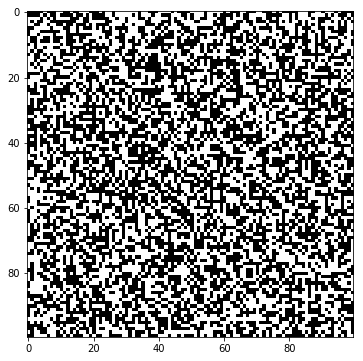

Unhappy:  3593


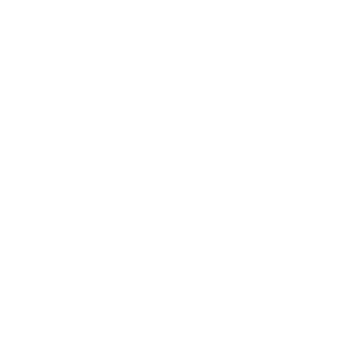

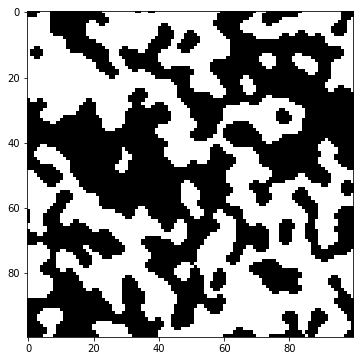

In [13]:
### MAIN:
# Initializing:
init(intolerance_min,intolerance_max)


### Initial Config Plot
axs = []

fig2 = plt.figure(figsize = (6,6)) # create a 5 x 5 figure 
axs.append(fig2.add_subplot(111)) 
axs[len(axs)-1].imshow(Agent.map_array, interpolation='none', cmap='Greys')

plt.show()

#### END plot

print "Unhappy: " , update()


fig = plt.figure(figsize = (6,6))
ax = plt.axes()

# Clear the canvas
def init_anim():
    return ax,


# The animation is made of the frames made in the following function
def animate(i):
    ax.imshow(Agent.map_array, interpolation='none', cmap='Greys')
    swap_count = 0
    for i in range(N**2/10):
        if single_swap(): swap_count += 1
    #print "swap_count: " , swap_count
    Agent.unhappy_agents_type_a = []
    Agent.unhappy_agents_type_b = []
    Agent.unhappy_count = 0

    Agent.all_rand_a = np.array([])
    Agent.all_rand_b = np.array([])
    Agent.exhaust = N
    update();
    #print "Unhappy: ", update()
    return ax,


# The following command actually starts the process
# Frames indicates the number of iteration
# TODO: Think of a way of defining a stopping criteria
anim = animation.FuncAnimation(fig, animate, init_func=init_anim,
                               frames=80, interval=500, blit=True)

# The following line, saves the animation an MPEG file.
anim.save('N_' + str(N) + '_min' + str(intolerance_min)+ \
          '_max_'+ str(intolerance_max)  + '.mp4'\
          ,fps=5,dpi=100)



### Final Config Plot
axs = []

fig2 = plt.figure(figsize = (6,6)) # create a 5 x 5 figure 
axs.append(fig2.add_subplot(111)) 
axs[len(axs)-1].imshow(Agent.map_array, interpolation='none', cmap='Greys')

###